<br/>
<h1 align="center"> <span style = 'color:red'> Breast Cancer Dataset
</span> </h1>
<br/>


<h3 align="left"> <span style = 'color:green'>  Usage:   </span> </h3>
<br/>


* W.N. Street, W.H. Wolberg and O.L. Mangasarian Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.


<br/>
<h3 align="left"> <span style = 'color:green'>  Goal:   </span> </h3>


* Predicting field 2, diagnosis: B = benign, M = malignant


* Sets are linearly separable using all 30 input features


* Best predictive accuracy obtained using one separating plane in the 3-D space of Worst Area, Worst Smoothness and Mean Texture attributes.  


* Estimated accuracy 97.5% using repeated 10-fold crossvalidations.  


* Classifier has correctly diagnosed 176 consecutive new patients as of November 	1995. 



<br/>
<h3 align="left"> <span style = 'color:green'> Relevant Information:   </span> </h3>



* Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  


* They describe characteristics of the cell nuclei present in the image. A few of the images can be found at http://www.cs.wisc.edu/~street/images/



* Number of instances: 569 



* Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)



<br/>
<h3 align="left"> <span style = 'color:green'>  Attribute information:   </span> </h3>


1) ID number

2) Diagnosis (M = malignant, B = benign)


3) Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)


4) All feature values are recoded with four significant digits.


5) Missing attribute values: none


5) Class distribution: 357 benign, 212 malignant






<br/>
<h3 align="left"> <span style = 'color:green'> Importando Bibliotecas     </span> </h3>


In [1]:
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
import numpy as np

<br/>
<h3 align="left"> <span style = 'color:green'>  Carregando base de dados com pandas   </span> </h3>


In [2]:
import pandas as pd
data = pd.read_csv("data.csv")

<br/>
<h3 align="left"> <span style = 'color:green'> Mostrando principais informações sobre a base de dados     </span> </h3>


In [3]:
print("\n \t A base tem {0[0]} linhas e {0[1]} colunas. \n".format(data.shape))

#mostrando informaçãoes sobre os recrusos (atributos) de entrada
data.info()

#mostrando 3 linhas do arquivo de dados
data.head(3)


 	 A base tem 569 linhas e 33 colunas. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


<br/>
<h3 align="left"> <span style = 'color:green'>  Retirando a coluna que tem a informação do Id do paciente, não faz parte do treinamento nem do teste   </span> </h3>



* Mostrando o novo formato da base de dados

In [5]:
data.drop('id',axis=1,inplace=True)

In [6]:
data.shape

(569, 32)

<br/>
<br/>
<h3 align="left"> <span style = 'color:green'> Contando quantos rotulos de cada classe exitem na base de dados     </span> </h3>




* Verificando o balanceamento da base

In [7]:
diagnosis_all = list(data.shape)[0]
diagnosis_categories = list(data['diagnosis'].value_counts())

print(80 * '*')
print("A base tem {} diagnosticos, sendo {} maligno ou M e {} benigno ou B.".format(diagnosis_all, 
                                                                                 diagnosis_categories[0], 
                                                                                 diagnosis_categories[1]))

print(80 * '*')

********************************************************************************
A base tem 569 diagnosticos, sendo 357 maligno ou M e 212 benigno ou B.
********************************************************************************


<br/>
<h3 align="left"> <span style = 'color:green'>  Plotando a matriz de correlação entre as variáveis   </span> </h3>


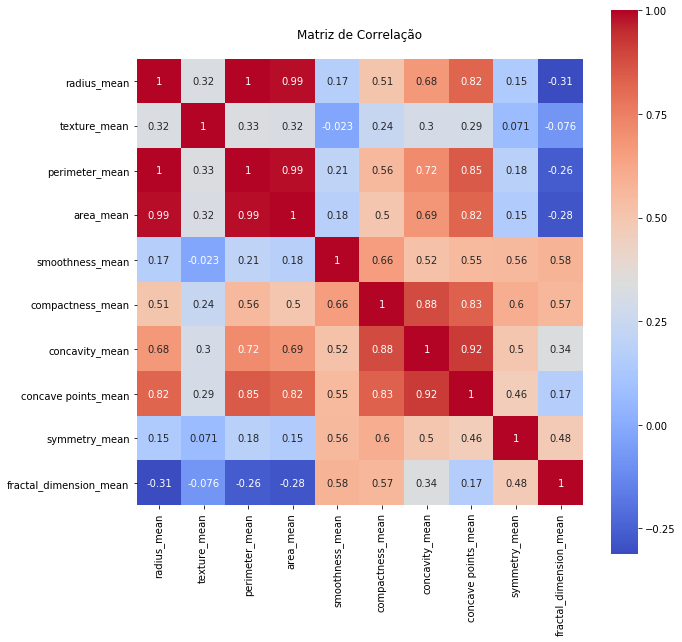

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


features_mean= list(data.columns[1:11])

plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.title('Matriz de Correlação\n')
plt.show()


<h3 align="left"> <span style = 'color:green'>  Observação   </span> </h3>



* Pelo gráfico acima pode-se ver que existem variáveis altamente correlacionadas


* Seria necessário utilizar o algum método de redução de dimensão, mas neste caso não será visto aqui



* Vamos optar por utilizar apenas a matriz de correlação para retirar da base as variaveis correlacionadas




<br/>

<br/>
<h3 align="left"> <span style = 'color:green'>  Plotando o grafico de dispersão para toodas as variaveis em função à saida   </span> </h3>



	 Grafico de Dispersão de todas as variaveis


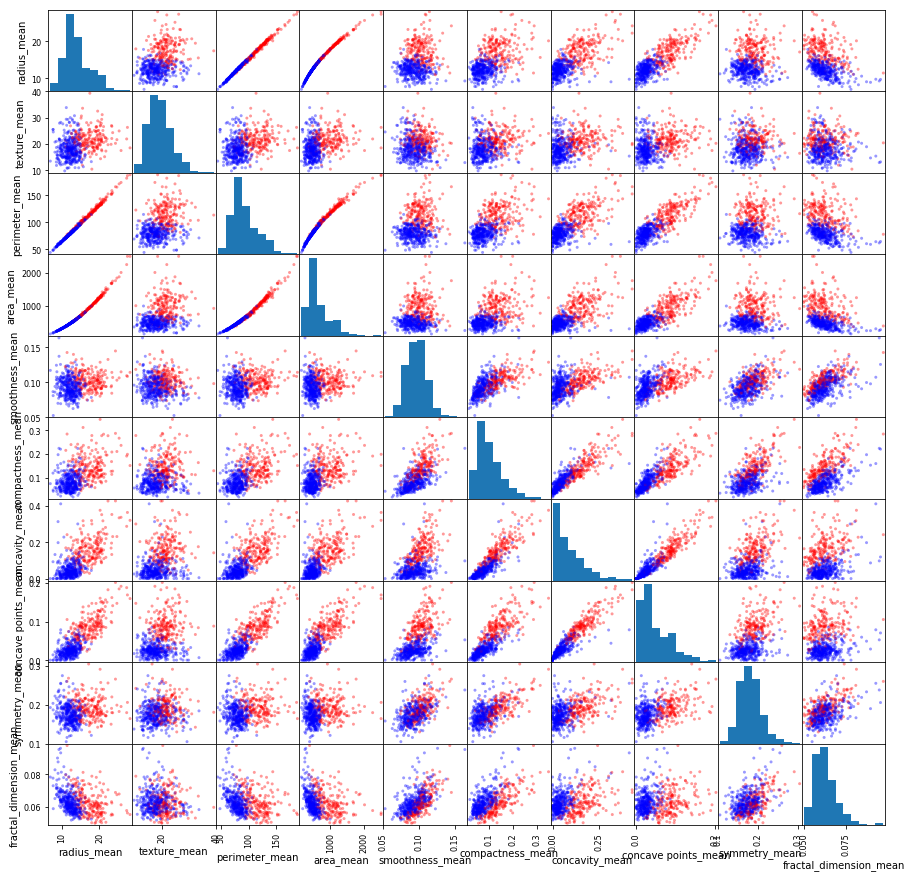

In [26]:
color_dic = {'M':'red', 'B':'blue'}
colors = data['diagnosis'].map(lambda x: color_dic.get(x))

print('\n\t Grafico de Dispersão de todas as variaveis')
sm = pd.plotting.scatter_matrix(data[features_mean], c=colors, alpha=0.4, figsize=((15,15)));


plt.show()

<br/>
<h3 align="left"> <span style = 'color:green'>  Plotando o histograma de todas as variaveis em função à saida   </span> </h3>



	Histogrrama das classes Maligno e Benigno


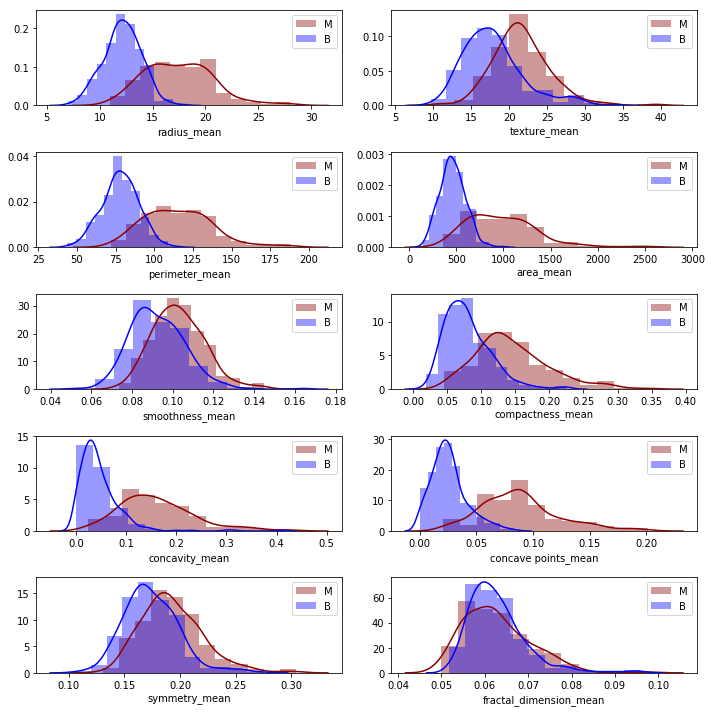

In [29]:
# verificando se os recursos seguem uma distribição normal em função das variaveis de saída
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print('\n\tHistogrrama das classes Maligno e Benigno')

bins = 12
plt.figure(figsize=(10,10))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='darkred', label='M');
    sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='blue', label='B');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

<br/>
<h3 align="left"> <span style = 'color:green'>  Selecionando variaveis para compor a nova base   </span> </h3>


* Essa nova base vai ser utilizada mais abaixo


* a primeira simulação utiliza a base toda


In [21]:
features_selection = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']

<br/>
<h3 align="left"> <span style = 'color:green'>   Importando bibliotecas  </span> </h3>


In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

<br/>
<h3 align="left"> <span style = 'color:green'> Transformando as variaveis categoricas M em 1 e B em 0    </span> </h3>






In [32]:
diag_map = {'M':1, 'B':0}
data['diagnosis'] = data['diagnosis'].map(diag_map)

<br/>
<h3 align="left"> <span style = 'color:green'> Nomeando a entrada e a saida  </span> </h3>


* Observe que foram utilizadas as médias dos valores das variaveis de entrada


* `X = data.loc[:,features_mean]`



In [13]:
# separando as variaveis em entrada X e saída Y - apenas os valores
X = data.loc[:,features_mean]
y = data.loc[:, 'diagnosis']

<br/>
<h3 align="left"> <span style = 'color:green'> Dividindo em treinamento e teste    </span> </h3>




In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

<br/>
<h3 align="left"> <span style = 'color:green'>  Criando o Modelo GaussianNB   </span> </h3>


In [17]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)


# predizendo novos valores
y_pred = clf.predict(X_test)


<h3 align="left"> <span style = 'color:green'>  Avaliando o Desempenho do modelo GaussianNB   </span> </h3>
<br/>

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


accuracy_score(y_test, y_pred)

print(40 * '*')
print("Acurácia para base toda: {0:.2%}".format(accuracy_score(y_test,y_pred)))
print(40 * '*')

print(classification_report(y_test, y_pred))


****************************************
Acurácia para base toda: 90.35%
****************************************
              precision    recall  f1-score   support

           B       0.90      0.96      0.93        72
           M       0.92      0.81      0.86        42

   micro avg       0.90      0.90      0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.90      0.90      0.90       114




<h3 align="left"> <span style = 'color:green'>   Utilizando a base de dados particionada   </span> </h3>
<br/>



* features_selection 


    * 'radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean

<br/>
<h3 align="left"> <span style = 'color:green'>Nomeando entrada e saida e dividindo a base em treinamento e teste   </span> </h3>


In [27]:
X1 = data.loc[:,features_selection]
y1 = data.loc[:, 'diagnosis']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 1)

<br/>
<h3 align="left"> <span style = 'color:green'>  Criando o modelo, treinando e predizendo   </span> </h3>


In [30]:
from sklearn.naive_bayes import GaussianNB


clf = GaussianNB()
clf.fit(X1_train, y1_train)

y_pred1 = clf.predict(X1_test)



accuracy_score(y1_test, y_pred1)

print(40 * '*')
print("Acurácia da particionada: {0:.2%}".format(accuracy_score(y_pred1, y1_test)))
print(40 * '*')


****************************************
Acurácia da particionada: 87.72%
****************************************


In [24]:
print(classification_report(y1_test, prediction))

              precision    recall  f1-score   support

           B       0.86      0.96      0.91        72
           M       0.91      0.74      0.82        42

   micro avg       0.88      0.88      0.88       114
   macro avg       0.89      0.85      0.86       114
weighted avg       0.88      0.88      0.87       114







* **Comparando os resultados**


In [31]:
print(40 * '*')
print("Acurácia base toda: {0:.2%}".format(accuracy_score(y_test,y_pred)))
print(40 * '*')
print("Acurácia da particionada: {0:.2%}".format(accuracy_score(y_pred1, y1_test)))
print(40 * '*')


****************************************
Acurácia base toda: 90.35%
****************************************
Acurácia da particionada: 87.72%
****************************************


<h3 align="left"> <span style = 'color:green'>  A base toda obteve melhor desempenho   </span> </h3>
